# Loading the Packages
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [1]:
#Loading the dataset
#Loading the Packages
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

train = pd.read_csv("C:\\Users\\FelixAdeyanju\\desktop\\train.csv")

In [2]:
#To see the structure of the train dataset 
train.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [3]:
#to see the shape of the train dataset
train.shape

(38312, 19)

In [4]:
print("The number of row and columns in test dataset:", train.shape)

The number of row and columns in test dataset: (38312, 19)


Cleaning the train dataset
1. to check the missing data
2. Finding the mode of variables for the missing data
2. to replace the missing data

In [5]:
#Finding the missing data in train
Total = train.isnull().sum().sort_values(ascending = False)
percent1 = train.isnull().sum()/train.isnull().count()*100
percent2 = round(percent1,1).sort_values(ascending = False)
missing_data = pd.concat([Total, percent2], axis =1, keys= ['Total', '%'])
missing_data.head()

,Total,%
Qualification,1679,4.4
EmployeeNo,0,0.0
Previous_Award,0,0.0
No_of_previous_employers,0,0.0
Previous_IntraDepartmental_Movement,0,0.0


In [6]:
#To find the mode of variable (Qualification) with the missing data 
train['Qualification'].describe()

count                   36633
unique                      3
top       First Degree or HND
freq                    25578
Name: Qualification, dtype: object

In [7]:
#To replace the missing value 
#(We replaced with variable with the top values First Degree or HND)
train['Qualification'] = train['Qualification'].fillna('First Degree or HND')

Feature extraction and Engineering

In [8]:
#To do some feature extraction for age and years spent by each staff
dataset = [train]
for data in dataset:
    data['age'] = 2021 - data['Year_of_birth']
    data['year_of_service'] = 2021 - data['Year_of_recruitment']

In [9]:
#To check new train dataset
train.head(5)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,...,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,age,year_of_service
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,...,41,ANAMBRA,No,Married,No,No,0,0,35,10
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,...,52,ANAMBRA,Yes,Married,No,No,0,0,30,6
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,...,42,KATSINA,Yes,Married,No,No,0,0,34,9
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,...,42,NIGER,Yes,Single,No,No,1,0,39,12
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,...,77,AKWA IBOM,Yes,Married,No,No,1,0,31,9


Visualization

In [10]:
from matplotlib import rcParams

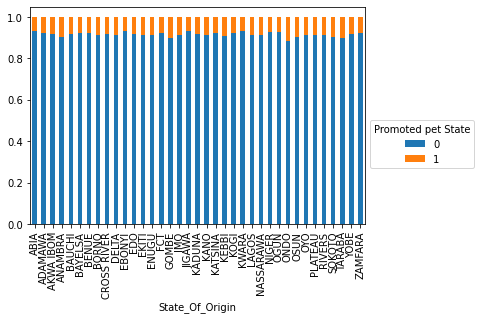

In [11]:
#To know the promotion per state
Vir = pd.crosstab(train.State_Of_Origin, train.Promoted_or_Not, normalize = 'index')
Vir.plot.bar(stacked = True)
plt.legend(title = 'Promoted pet State', bbox_to_anchor = (1, 0.5))

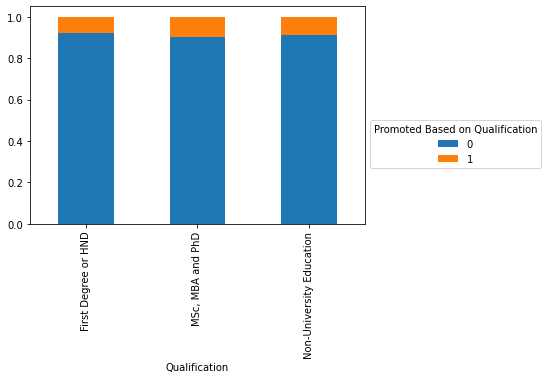

In [12]:
#To know the Promotion based on Qualification
Vir = pd.crosstab(train.Qualification, train.Promoted_or_Not, normalize = 'index')
Vir.plot.bar(stacked = True)
plt.legend(title = 'Promoted Based on Qualification', bbox_to_anchor = (1, 0.5))

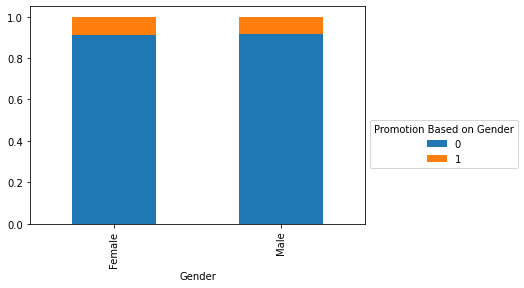

In [13]:
#To know the Promotion based on Gender
Vir = pd.crosstab(train.Gender, train.Promoted_or_Not, normalize = 'index')
Vir.plot.bar(stacked = True)
plt.legend(title = 'Promotion Based on Gender', bbox_to_anchor = (1, 0.5))

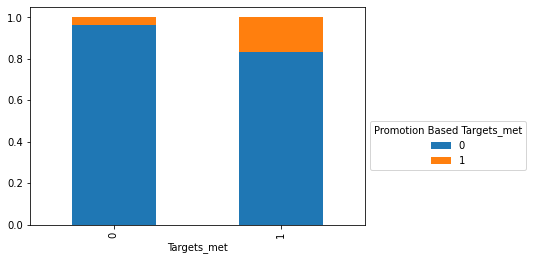

In [14]:
#To know the Promotion based on Target realization
Vir = pd.crosstab(train.Targets_met, train.Promoted_or_Not, normalize = 'index')
Vir.plot.bar(stacked = True)
plt.legend(title = 'Promotion Based Targets_met', bbox_to_anchor = (1, 0.5))

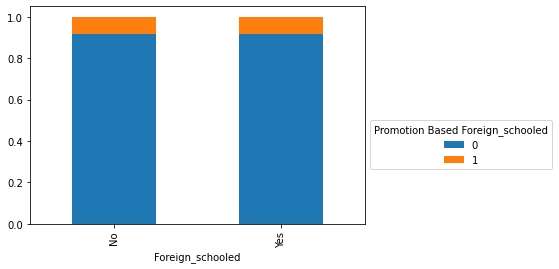

In [15]:
#To know the Promotion based on Target realization
Vir = pd.crosstab(train.Foreign_schooled, train.Promoted_or_Not, normalize = 'index')
Vir.plot.bar(stacked = True)
plt.legend(title = 'Promotion Based Foreign_schooled', bbox_to_anchor = (1, 0.5))

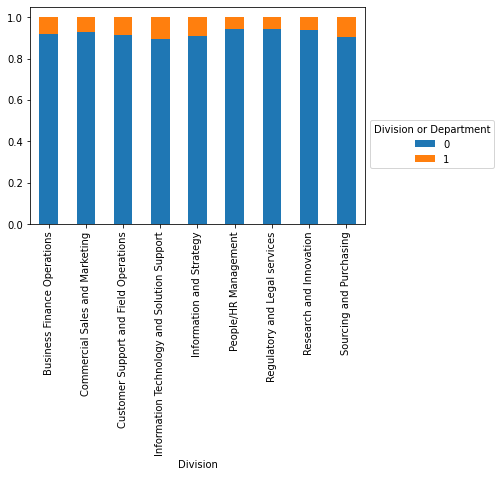

In [16]:
#To know the Promotion based on Target realization
Vir = pd.crosstab(train.Division, train.Promoted_or_Not, normalize = 'index')
Vir.plot.bar(stacked = True)
plt.legend(title = 'Division or Department', bbox_to_anchor = (1, 0.5))

Dropping unuseful Columns and Encoding Categorial features

In [17]:
#Dropping unuseful Columns
#Year_of_recruitment, year_of_birth and state of origin will be dropped
train = train.drop(['Year_of_recruitment', 'Year_of_birth', 'EmployeeNo', 'State_Of_Origin'], axis = 1)

In [18]:
#To encode each of the columns 
## loading of from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [19]:
#To check the column
train.head(1)

,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,age,year_of_service
0,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,12.5,1,0,41,No,Married,No,No,0,0,35,10


In [20]:
train_new = ['Division', 'Gender', 'Channel_of_Recruitment', 'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
             'Previous_IntraDepartmental_Movement', 'No_of_previous_employers']

In [21]:
le = LabelEncoder()
for column in train_new:
    train[column] = le.fit_transform(train[column])

In [22]:
# to check for any yet to be encoded column
print(train.select_dtypes('object').columns)

Index(['Qualification'], dtype='object')


In [23]:
#To know the unique values of Qualification
train['Qualification'].unique()

array(['MSc, MBA and PhD', 'First Degree or HND',
       'Non-University Education'], dtype=object)

In [24]:
#Encoding Qualification with the level of education
train['Qualification'] = train['Qualification'].replace(('MSc, MBA and PhD', 'First Degree or HND',
                                                        'Non-University Education'), (3,2,1))

We check to check for imbalance in the database.
The below show that there is imbalance between the promoted and not promoted.
There is need to cater for the imbalance in the dataset.

The treat the imbalance i applied  oversampling using SMOTE.

In [25]:
#To check for imbalance in the dataset
train.Promoted_or_Not.value_counts()

0    35071
1     3241
Name: Promoted_or_Not, dtype: int64

C:\Users\FelixAdeyanju\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Promoted_or_Not', ylabel='count'>

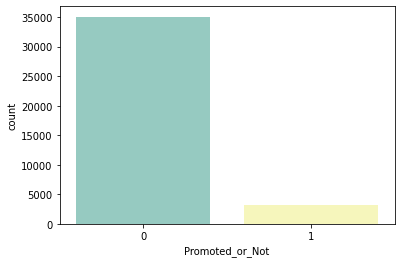

In [26]:
#To Plot promoted against not promoted 
#This allow us to check for imbalance in the dataset
#It is clear that there is imbance in the dataset
sns.countplot(train['Promoted_or_Not'], palette='Set3')

In [27]:
X = train.drop(["Promoted_or_Not"], axis=1).values #Setting the X to do the split
y = train["Promoted_or_Not"].values # transforming the values in array
X = pd.DataFrame(X)

In [28]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score

There is need to treate the imbalance in the dataset to prevent
baise in the train sample. This is done in order to improce the
the performance of the model. 

In [29]:
#To treat the imbalance, we need to import the SMOTE algorithm
from imblearn.over_sampling import SMOTE
# the function that we will use to better evaluate the model
def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f2: {}".format(fbeta_score(true_value, pred, beta=2)))

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.20)

classifier = RandomForestClassifier

# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), \
                                   classifier(random_state=42))

smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)

#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE().fit_sample(X, y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 35071, 1: 3241})
SMOTE data distribution: Counter({0: 35071, 1: 35071})


In [30]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, smote_prediction))

print('\nSMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test, y_test)))

print_results("\nSMOTE + RandomForest classification", y_test, smote_prediction)

Confusion Matrix: 
[[6940   71]
 [ 471  181]]

SMOTE Pipeline Score 0.9292705206838053

SMOTE + RandomForest classification
accuracy: 0.9292705206838053
precision: 0.7182539682539683
recall: 0.2776073619631902
f2: 0.31643356643356646


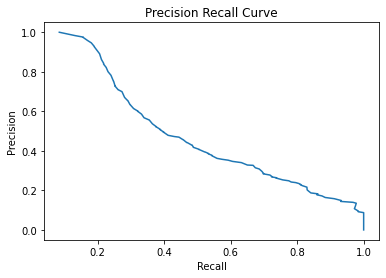

In [31]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = smote_pipeline.predict_proba(X_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

I will make use of three models to determine the best models
I made use of the following models:

1) DecisionTreeClassifier
2) KNeighbors And
3) RandomForestClassifier 

In [32]:
#let use decision tree for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [33]:
print('train accuracy:', model.score(X_train, y_train))
print('test accuracy:', model.score(X_test, y_test))

#To calculate Classifier report
cr = classification_report(y_test, y_predict)
print(cr)

cm = confusion_matrix(y_test, y_predict)
plt.rcParams['figure.figsize'] = (2,2)

train accuracy: 0.999575842604979
test accuracy: 0.8928618034712253
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7011
           1       0.39      0.45      0.42       652

    accuracy                           0.89      7663
   macro avg       0.67      0.69      0.68      7663
weighted avg       0.90      0.89      0.90      7663



In [34]:
#let use KNeighbors for the model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

print('train accuracy:', knn.score(X_train, y_train))
print('test accuracy:', knn.score(X_test, y_test))

#To calculate Classifier report
cr = classification_report(y_test, y_predict)
print(cr)

cm = confusion_matrix(y_test, y_predict)
plt.rcParams['figure.figsize'] = (2,2)

train accuracy: 0.9414989069790205
test accuracy: 0.916612292835704
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7011
           1       0.53      0.17      0.26       652

    accuracy                           0.92      7663
   macro avg       0.73      0.58      0.61      7663
weighted avg       0.89      0.92      0.90      7663



In [35]:
#lets use RandomFores for the model

classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

print('train accuracy:', classifier.score(X_train, y_train))
print('test accuracy:', classifier.score(X_test, y_test))

#To calculate Classifier report
cr = classification_report(y_test, y_predict)
print(cr)

cm = confusion_matrix(y_test, y_predict)
plt.rcParams['figure.figsize'] = (2,2)

train accuracy: 0.9995432151130542
test accuracy: 0.9334464309017356
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7011
           1       0.83      0.28      0.41       652

    accuracy                           0.93      7663
   macro avg       0.88      0.64      0.69      7663
weighted avg       0.93      0.93      0.92      7663



FINDING THE FEATURE IMPORTANCE OF THE VARIABLES

#After we made use of 3 models.

#The model with the highest Accuracy for both Training and test data is RandomForestClassifier.

#We will make use of the best model to find the feature importance of each of variables.

In [36]:

features = ["Division", "Qualification","Gender","Channel_of_Recruitment","Trainings_Attended","Last_performance_score","Targets_met","Previous_Award", "Training_score_average", "Foreign_schooled",
                       "Marital_Status","Past_Disciplinary_Action","Previous_IntraDepartmental_Movement","No_of_previous_employers", "age", "year_of_service"]


importances = pd.DataFrame({'features':features, 'importance':np.round(classifier.feature_importances_*100, 3)})
importances = importances.sort_values('importance', ascending = False).set_index('features')
importances.head(16)

,importance
features,
Training_score_average,29.187
age,14.173
year_of_service,10.555
Division,10.287
No_of_previous_employers,6.118
Last_performance_score,5.634
Targets_met,4.917
Channel_of_Recruitment,3.710
Previous_Award,3.484


Text(0.5, 1.0, 'Feature Importances')

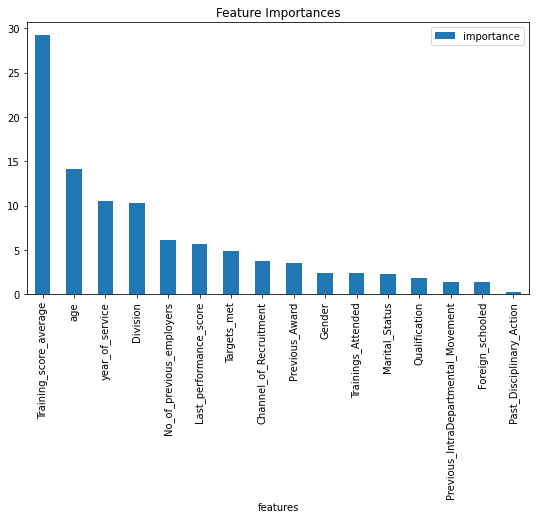

In [37]:
#to plot the importance
importances.plot.bar(figsize = (9,5))
plt.title('Feature Importances')

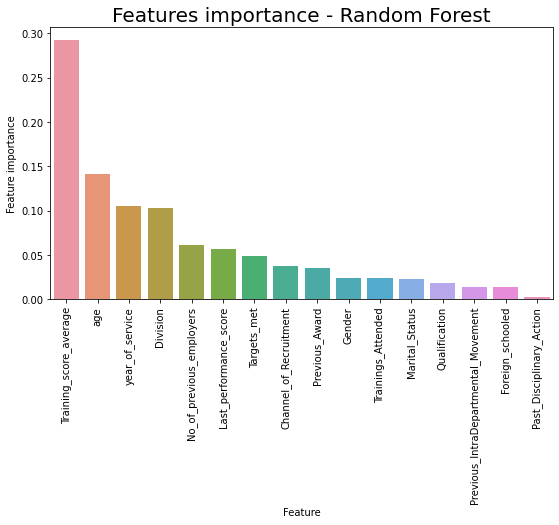

In [38]:
# To find the feature importance of each of variables
# WE will make use of RandomForestClassifier (with the accuracy of 99.9% and 93.5% for train and test sample respectively)


features = ["Division", "Qualification","Gender","Channel_of_Recruitment","Trainings_Attended","Last_performance_score","Targets_met","Previous_Award", "Training_score_average", "Foreign_schooled",
                       "Marital_Status","Past_Disciplinary_Action","Previous_IntraDepartmental_Movement","No_of_previous_employers", "age", "year_of_service"]

                                            
                                                                    
plt.figure(figsize = (9,5))

feat_import = pd.DataFrame({'Feature': features, 'Feature importance': classifier.feature_importances_})
feat_import = feat_import.sort_values(by='Feature importance',ascending=False)

g = sns.barplot(x='Feature',y='Feature importance',data=feat_import)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Features importance - Random Forest',fontsize=20)
plt.show()